# Ejercicios sobre lo aprendido

## Suban este notebook resuelto al drive con la nomenclatura nombre_apellido_TP_6

----

### Usemos lo aprendido

Elijan un .csv con datos que les sean de interes, pueden buscarlo en alguna de las paginas compartidas al final del notebook `05-Cargamos_dataframes` o puede ser de otro lado, queda en ustedes.

Cargar el archivo en un dataframe y hacer los siguientes analisis, mostrando de manera ordenada lo encontrado.

1. Existen valores nulos en nuestro conjunto de datos? Los reemplazamos, eliminamos o que hacemos con ellos?
2. Hay valores duplicados? Puede haber duplicados? Tenemos que tratarlos?
3. Elijamos una columna para analizar la cantidad de valores unicos que tiene, y cuales son.
4. Hagan los analisis que ustedes quieran !!

Vamos a tomar un dataset sobre música en Spotify, tomado de https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks/download. El análisis lo vamos a hacer, mor de la brevedad del tiempo para este ensayo de análisis, como si esta fuera la muestra que toma el universo completo de la música. Sin importar si esta define o no un género de sonidos específico, o sea sin considerarla teóricamente en lo que define al tiempo que transcurre donde se produce el fenómeno "musical". De esta información vamos a tomar 3 cortes cada 10 años y presuponer que muestran, además, tendencias que estadísiticamente se verifican por la muestra y análisis que realizamos sobre ella. Sobre la marcha del análisis de datos vamos a ir dando las pautas de lo verificado a partir de lo que se vaya indicando.

In [1]:
#importamos los módulos y cargamos el dataset. Vemos en la info que no tiene objetos NaN. Y que contiene casi 170k filas.
# Seguidamente vamos a inspeccionarlas y tomar algunas para realizar análisis de datos, siempre bajo la premisa antedicha.

import pandas as pd
import numpy as np
data=pd.read_csv("data.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [2]:
#Observamos que no tenemos datos vacíos.
#Eliminamos las columnas que no nos interesarán en nuestro análisis.

data.drop(["acousticness", "id", "instrumentalness","liveness","release_date","valence", "mode", "speechiness","energy"], axis=1, inplace=True)


In [3]:
#La columna "key" nos trae la nota en que se estructuran las canciones, vamos a cambiar los valores numéricos por las notas
#en lenguaje natural, ya que nos resulta más sencillo leer y nos interesará chequear esa variable.
#Vamos a traducir también nuestras columnas.
data["key"].replace({0:"C", 1:"C#", 2:"D", 3:"D#", 4:"E", 5:"F", 6:"F#", 7:"G", 8:"G#", 9:"A", 10:"A#", 11:"B"}, inplace=True)
data=data.rename(columns={"artists":"artistas", "danceability":"bailable", "duration_ms":"duración","explicit":"explicito", "key":"tono","loudness":"volumen","name":"nombre","popularity":"pop", "year":"año"})

In [4]:
#Nos interesa hacer tres cortes cada 10 años: 1980-1990-2000. Para tomarlos y hacer comparaciones que
#ganen en algo a nuestra comprensión a partir de su contraste. Creamos dfs por cada corte para análisis.

data_80=data[data["año"]==1980]
data_90=data[data["año"]==1990]
data_00=data[data["año"]==2000]

In [5]:
#chequeamos la cantidad de canciones por año. Tomando la muestra como el universo efectivo, vamos a suponer que representan
#realmente y por tanto que cada año tiene exacta cantidad de canciones lanzadas en el mismo.

print(data_80["tono"].value_counts().sum())
print(data_90["tono"].value_counts().sum())
print(data_00["tono"].value_counts().sum())

2000
2000
2000


In [6]:
ex80=data_80["explicito"].sum()
y80=data_80["año"].unique()
ex90=data_90["explicito"].sum()
y90=data_90["año"].unique()
ex00=data_00["explicito"].sum()
y00=data_00["año"].unique()
print(f"la cantidad de canciones tomadas como explícitas por Spoty por año es:\n1980: {ex80}\n1990: {ex90}\n2000: {ex00}")
#al observar un crecimiento lineal, vamos a chequear si este se sostiene en toda la muestra...

la cantidad de canciones tomadas como explícitas por Spoty por año es:
1980: 13
1990: 91
2000: 316


Text(0.5, 1.0, 'proyección explícitas')

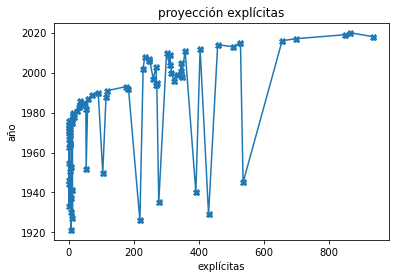

In [7]:
#creamos un gráfico para mostrar los datos que analizamos
import matplotlib.pyplot as plt
añis=np.array(data.loc[data["explicito"]==1,"año"].value_counts().index.tolist()).reshape(74,1)
explis=np.array(data.loc[data["explicito"]==1,"año"].value_counts().tolist()).reshape(74,1)
plt.plot(explis,añis, marker="X")
plt.xlabel("explícitas")
plt.ylabel("año")
plt.title("proyección explícitas")

In [8]:
#creamos un modelo de predicción con regresión lineal... nos daremos cuenta que overfiteamos nuestro modelo de aprendizaje
#ya que es una regresión simple, y al haber un salto cuantitativos de los data sets, toma muchos valores 0 y eso distorsiona de
#más el cálculo de la regresión lineal simple que hicimos. Si probamos en un modelo sólo con los data sets que tomamos original_
#mente, la predicción es más acertada. Esto lo comprobamos al correr el año 20' y el 21' en la anteúltima línea del sig. código:

from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(añis,explis)
y_pred = regr.predict(añis)
y_veintiuno = regr.predict([[2021]])
print(f"EXPLICITAS \npredicción 2021: {int(y_veintiuno)}")
print(data.loc[data["explicito"]==1, "año"].value_counts().head(3))

EXPLICITAS 
predicción 2021: 394
2018    936
2020    865
2019    848
Name: año, dtype: int64


In [9]:
#fijémonos que predecimos mejor el 21' presumiblemente ya que el 20' del cual sí tenemos data, nos arroja más cercano... al 
#correrlo vemos que sigue siendo muy mal predictor el que construimos. De nuevo, explorando en la muestra, hay saltos cuantitati_
#vos muy importantes desde el 2015 y desde el 2000, por lo tanto, con nuestro modelo de regresión simple, y los datos que tomamos
#para entrenarlo, resulta insuficiente para construir un predictor eficaz de proyección de canciones explícitas. Este trabajo de
#entrenamiento y construcción del predictor nos costó tanto que elegimos dejarlo sólo como aprendizaje de por qué salió mal.
#Bueno sería para un trabajo final, poder construir uno acertado y relevante para algun proyectito más útil.

expl80=data_80[data_80["explicito"]==1]["explicito"].sum()
expl90=data_90[data_90["explicito"]==1]["explicito"].sum()
expl00=data_00[data_00["explicito"]==1]["explicito"].sum()
expl15=data[data["año"]==2015]["explicito"].sum()
arr_exp=np.array([expl80,expl90,expl00,expl15]).reshape(4,1)
arr_año=np.array([1980,1990,2000,2015]).reshape(4,1)
regr_dos=linear_model.LinearRegression()
regr_dos.fit(arr_año,arr_exp)
exp_pred= regr_dos.predict(arr_año)
pred_veintiuno = regr_dos.predict([[2021]])
print(f"EXPLICITAS \npredicción 2021: {int(pred_veintiuno)}")
print(data.loc[data["explicito"]==1, "año"].value_counts().head(3))

EXPLICITAS 
predicción 2021: 618
2018    936
2020    865
2019    848
Name: año, dtype: int64


In [10]:
#seguimos explorando la muestra, esta vez por el tono mayormente utilizado en nuestras 3 muestras del 80 al 00. Vemos que las
#tonalidades Sol, La y Do son las predominantes. Concluimos simplemente en ello.

print(data_80["tono"].value_counts().nlargest(2))
print(data_90["tono"].value_counts().nlargest(2))
print(data_00["tono"].value_counts().nlargest(2))


C    294
A    282
Name: tono, dtype: int64
G    282
A    235
Name: tono, dtype: int64
G    258
C    238
Name: tono, dtype: int64


In [11]:
#chequeamos bailabilidad, lo hacemos sumando el valor total de las canciones de cada año para este ítem, encontramos que hay una
#reducción del valor bailable en los 90'.

bailables= {"1980":data_80["bailable"].sum(), "1990":data_90["bailable"].sum(), "2000":data_00["bailable"].sum()}
pd.Series(bailables)
baile=pd.DataFrame(bailables,["bailable"])
baile

,1980,1990,2000
bailable,1115.677,1090.3707,1178.0788


## Suban este notebook resuelto al drive con la nomenclatura nombre_apellido_TP_6